*Series* — одномерный массив, способный хранить значения любого типа. По своей структуре напоминает словарь: каждому значению присваивается метка (индекс), которая может быть как числом, так и строкой.
*DataFrame* — двумерная таблица, в которой строки и столбцы имеют имена. Каждый столбец — это объект класса Series, а сами данные удобно организованы для анализа и преобразований.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
s = pd.Series(np.linspace(1, 5, 5), index=range(1, 6))

print(s)

1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64


In [104]:
d = {"a": 10, "b": 20, "c": 30, "g": 40}
print(pd.Series(d))
print()
print(pd.Series(d, index=["a", "b", "c", "d"]))


a    10
b    20
c    30
g    40
dtype: int64

a    10.0
b    20.0
c    30.0
d     NaN
dtype: float64


In [105]:
index = ["a", "b", "c"]

print(pd.Series(5, index=index))

# Если data — число, обязательно передаётся index, определяющий количество элементов:

a    5
b    5
c    5
dtype: int64


In [106]:
s = pd.Series(np.arange(1, 6), index=["a", "b", "c", "d", "e"])

print(s["c"])
print(s[2:4])
print(s["c"] + s["c"])
print(s[["c", "d"]])

3
c    3
d    4
dtype: int64
6
c    3
d    4
dtype: int64


In [107]:
s = pd.Series(np.arange(1, 6), index=["a", "b", "c", "d", "e"])

print(s[s > 2])

c    3
d    4
e    5
dtype: int64


In [108]:
s.name = "Данные"
s.index.name = "Индекс"
print(s)

Индекс
a    1
b    2
c    3
d    4
e    5
Name: Данные, dtype: int64


In [109]:
students_marks_dict = {
    "student": ["Студент_1", "Студент_2", "Студент_3"],
    "math": [5, 3, 4],
    "physics": [4, 5, 5]
}

students = pd.DataFrame(students_marks_dict)
print(s)

Индекс
a    1
b    2
c    3
d    4
e    5
Name: Данные, dtype: int64


In [110]:
print(students.index)
print(students.columns)

students.index = range(1, 4)
print(students)

RangeIndex(start=0, stop=3, step=1)
Index(['student', 'math', 'physics'], dtype='object')
     student  math  physics
1  Студент_1     5        4
2  Студент_2     3        5
3  Студент_3     4        5


In [111]:
print(students["student"][1])
print()
print(students.loc[1])

Студент_1

student    Студент_1
math               5
physics            4
Name: 1, dtype: object


In [112]:
students = pd.read_csv("/Users/nickolaykrasnenko/Documents/GitHub/SnowFlake/Python_Analysis/Data.csv")

In [113]:
print(students.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [114]:
print(students.tail())

     gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  


In [115]:
print(students[10:13])

    gender race/ethnicity parental level of education     lunch  \
10    male        group C          associate's degree  standard   
11    male        group D          associate's degree  standard   
12  female        group B                 high school  standard   

   test preparation course  math score  reading score  writing score  
10                    none          58             54             52  
11                    none          40             52             43  
12                    none          65             81             73  


In [116]:
print(students[students["test preparation course"] == "completed"]["math score"].head())

1     69
6     88
8     64
13    78
18    46
Name: math score, dtype: int64


In [117]:
with_course = students[students["test preparation course"] == "completed"]

print(with_course[["math score", "reading score", "writing score"]]
      .sort_values(["math score", "reading score", "writing score"], ascending=False)
      .head(),)

     math score  reading score  writing score
916         100            100            100
149         100            100             93
625         100             97             99
623         100             96             86
114          99            100            100


In [118]:
students["total_score"] = (students["math score"]
                           + students["reading score"]
                           + students["writing score"])

print(students.sort_values("total_score", ascending=False).head())

     gender race/ethnicity parental level of education     lunch  \
916    male        group E           bachelor's degree  standard   
458  female        group E           bachelor's degree  standard   
962  female        group E          associate's degree  standard   
114  female        group E           bachelor's degree  standard   
179  female        group D            some high school  standard   

    test preparation course  math score  reading score  writing score  \
916               completed         100            100            100   
458                    none         100            100            100   
962                    none         100            100            100   
114               completed          99            100            100   
179               completed          97            100            100   

     total_score  
916          300  
458          300  
962          300  
114          299  
179          297  


In [119]:
scores = students.assign(total_score=lambda x: x["math score"]
                                          + x["reading score"]
                                          + x["writing score"])

print(scores.sort_values("total_score", ascending=False).head())

     gender race/ethnicity parental level of education     lunch  \
916    male        group E           bachelor's degree  standard   
458  female        group E           bachelor's degree  standard   
962  female        group E          associate's degree  standard   
114  female        group E           bachelor's degree  standard   
179  female        group D            some high school  standard   

    test preparation course  math score  reading score  writing score  \
916               completed         100            100            100   
458                    none         100            100            100   
962                    none         100            100            100   
114               completed          99            100            100   
179               completed          97            100            100   

     total_score  
916          300  
458          300  
962          300  
114          299  
179          297  


In [120]:
print(
    students
      .groupby(["gender", "test preparation course"])["writing score"]
      .count()
)

gender  test preparation course
female  completed                  184
        none                       334
male    completed                  174
        none                       308
Name: writing score, dtype: int64


In [123]:
agg_functions = {"math score": ["mean", "median", "max"]}

print(students.groupby(["gender", "test preparation course"]).agg(agg_functions))

                               math score            
                                     mean median  max
gender test preparation course                       
female completed                67.195652   67.0   99
       none                     61.670659   62.0  100
male   completed                72.339080   73.0  100
       none                     66.688312   67.0   97


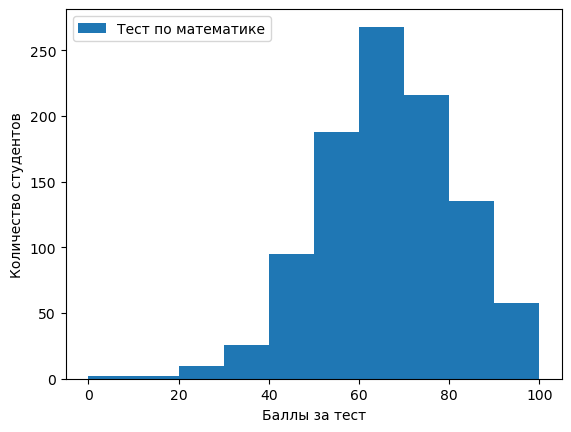

In [136]:
plt.hist(students["math score"], label="Тест по математике")
plt.xlabel("Баллы за тест")
plt.ylabel("Количество студентов")
plt.legend()
plt.show()

In [182]:
list1 = [
    '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
    ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|',
    '}', '~', "1", "2", "3", "4", "5", "6", "7", "8", "9", "0"
]


def length_stats(new):

    index1 = "".join(i for i in new if i not in list1).split(" ")
    index1 = sorted(list(set(j.lower() for j in index1)))
        
    return pd.Series(map(len, index1), index=index1, dtype="int64")

print(length_stats('Лес, опушка, странный домик. Лес, опушка и зверушка.'))

домик       5
зверушка    8
и           1
лес         3
опушка      6
странный    8
dtype: int64
